<a href="https://colab.research.google.com/github/AyushMehta0/Exploratory_Data_Analysis_netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis
##Netflix Data Analysis with Python
The dataset I have used for the Netflix data analytics task consists of TV shows and movies streamed on Netflix as of 2021. The dataset is
provided by Flixable which is an engine of third-party research available on Netflix.


1.   List item
2.   List item




In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/shivamb/netflix-shows'

od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushmehta02
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows


100%|██████████| 1.34M/1.34M [00:00<00:00, 93.9MB/s]

In [ ]:
data_filename = './netflix-shows/netflix_titles.csv'

##Data Preparation and Cleaning


1.   Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values





In [ ]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis
df=pd.read_csv(data_filename)
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


###Import Seaborn to show heat map of null value counts

<Axes: >

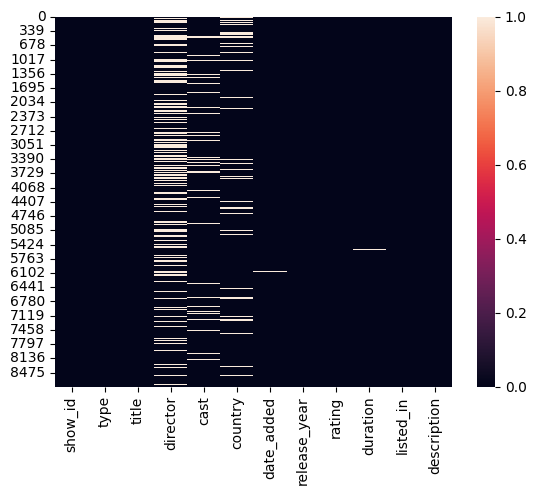

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#convert the dtype from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')


###Filling the null values

In [ ]:
df.fillna({'rating':'Unavailable', 'cast':'Unavailable', 'country':'Unavailable', 'director':'Unavailable' }, inplace = True)

In [ ]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
#Replace the missing values of date_added with most recent date available
most_recent = df['date_added'].max()
df.fillna({'date_added': most_recent}, inplace = True)

##Visualizations:


In [ ]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

NameError: name 'plt' is not defined

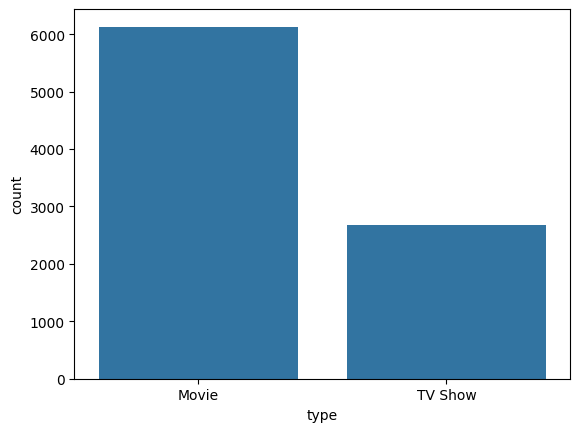

In [ ]:
sns.countplot(x='type', data = df)
plt.title('Count vs type of shows')

#Observation
 ###On Netflix there are more movies than tv shows

#Country Analysis

In [ ]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

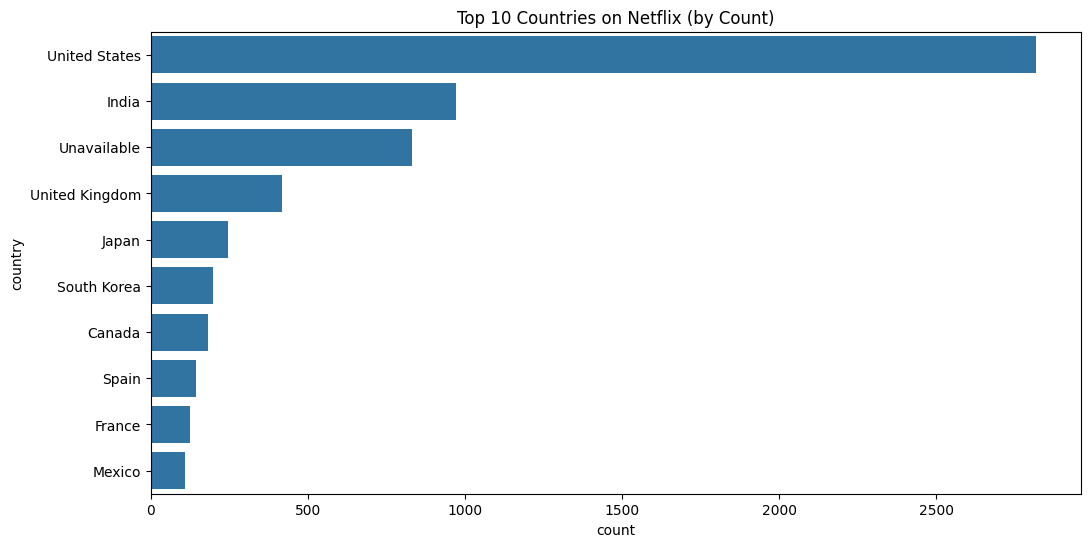

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming Seaborn is imported

fig, ax = plt.subplots(figsize=(12, 6))  # Create figure and axes
sns.countplot(y='country', order=df['country'].value_counts().index[0:10], data=df, ax=ax)  # Use ax for plotting
plt.title('Top 10 Countries on Netflix (by Count)')  # More descriptive title
plt.show()  # Add this line to display the plot


##Lets check the major ratings on Netflix

In [ ]:
df.rating.value_counts()

rating
TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
Unavailable       4
NC-17             3
UR                3
74 min            1
84 min            1
66 min            1
Name: count, dtype: int64

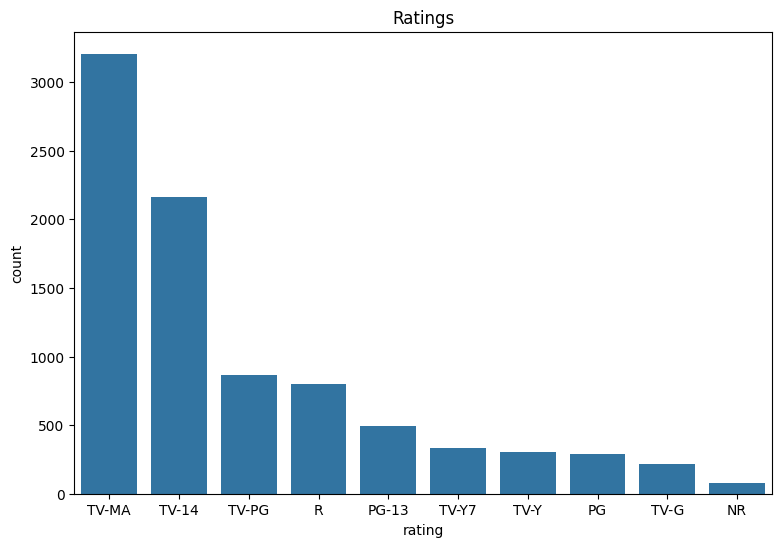

In [ ]:
plt.subplots(figsize= (9, 6))
sns.countplot(x = 'rating', order = df['rating'].value_counts().index[0:10], data = df)
plt.title("Ratings")
plt.show()

##Observation : Most of the TV shows are TV-MA and TV-14

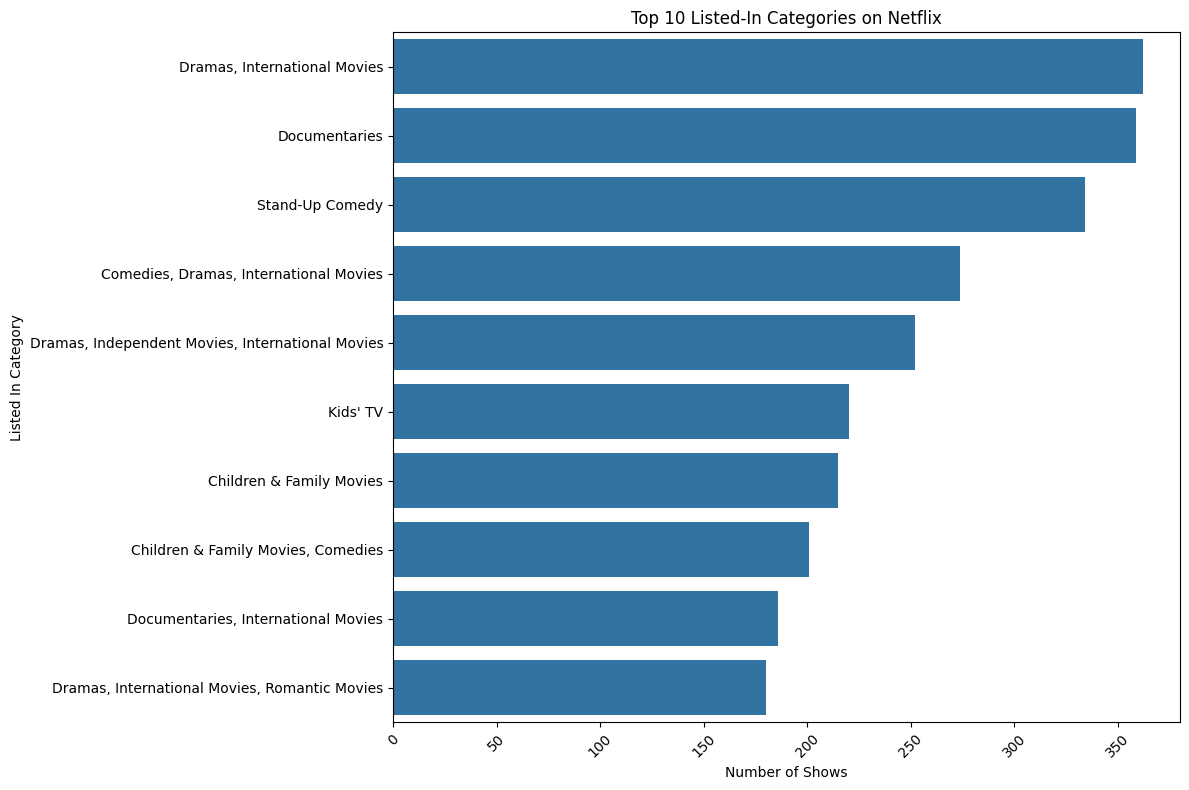

In [ ]:

plt.figure(figsize=(12, 8))  # Create the figure with desired size

# Countplot with listed_in categories
sns.countplot(
    y="listed_in",
    order=df["listed_in"].value_counts().index[0:10],
    data=df
)

plt.title("Top 10 Listed-In Categories on Netflix")  # More descriptive title
plt.xlabel("Number of Shows")  # Label for the x-axis (count)
plt.ylabel("Listed In Category")  # Label for the y-axis (categories)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()  # Adjust spacing for better readability (optional)

plt.show()  # Display the plot